# 1. Import required modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
from skimage import data
import skimage
from skimage.filters.thresholding import threshold_li,threshold_local,threshold_otsu
from skimage.morphology import erosion, dilation, opening, closing, white_tophat, remove_small_objects, ball
from skimage.morphology import disk
from scipy import ndimage as ndi
import sys,os, glob

#import skimage.filters.median

#import skimage.segmentation as seg
#import skimage.filters as filters
#import skimage.draw as draw
#import skimage.color as color

#from skimage.filters.thresholding import _cross_entropy
#from skimage.morphology import black_tophat, skeletonize, convex_hull_image


#pip install nd2reader_required for nd2 file reading
from nd2reader import ND2Reader

import pandas as pd

c:\programdata\anaconda3\lib\site-packages\skimage\io\manage_plugins.py:23: UserWarning: Your installed pillow version is < 7.1.0. Several security issues (CVE-2020-11538, CVE-2020-10379, CVE-2020-10994, CVE-2020-10177) have been fixed in pillow 7.1.0 or higher. We recommend to upgrade this library.
  from .collection import imread_collection_wrapper


# 2. Define common parameters for measurement loading here:

## 45h exps

In [2]:
# load experiment exp1

analysis_fd = r'D:\Analyzed_CellBio\Stam\Revision_exps\220331IF_210217exp_p53ko_fixed\p53ko_45h\analysis_subset_controlled'

exp1_df = pd.read_excel(analysis_fd + os.sep + 'measurement_for_all_fov_background_subtracted_2_100_crop.xlsx')

In [3]:
# load experiment exp2

analysis_fd = r'D:\Analyzed_CellBio\Stam\Revision_exps\220331IF_210302exp_p53ko_fixed\p53ko_45h\analysis_subset_controlled'

exp2_df = pd.read_excel(analysis_fd + os.sep + 'measurement_for_all_fov_background_subtracted_2_100_crop.xlsx')

In [4]:
d2_combined_df = pd.concat([exp1_df,exp2_df])

len(d2_combined_df)


#measurement_for_all_fov_df = ctrl_combined_df

216

## 4d exps

In [5]:
# load experiment exp1

analysis_fd = r'D:\Analyzed_CellBio\Stam\Revision_exps\220331IF_210217exp_p53ko_fixed\p53ko_4days\analysis_subset_controlled'

exp1_df = pd.read_excel(analysis_fd + os.sep + 'measurement_for_all_fov_background_subtracted_2_100_crop.xlsx')

In [6]:
# load experiment exp2

analysis_fd = r'D:\Analyzed_CellBio\Stam\Revision_exps\220331IF_210302exp_p53ko_fixed\p53ko_4days\analysis_subset_controlled'

exp2_df = pd.read_excel(analysis_fd + os.sep + 'measurement_for_all_fov_background_subtracted_2_100_crop.xlsx')

In [7]:
d4_combined_df = pd.concat([exp1_df,exp2_df])

len(d4_combined_df)


#measurement_for_all_fov_df = ctrl_combined_df

438

## 8d exps

In [8]:
# load experiment exp1

analysis_fd = r'D:\Analyzed_CellBio\Stam\Revision_exps\220331IF_210217exp_p53ko_fixed\p53ko_8days\analysis_subset_controlled'

exp1_df = pd.read_excel(analysis_fd + os.sep + 'measurement_for_all_fov_background_subtracted_2_100_crop.xlsx')

In [9]:
# load experiment exp2

analysis_fd = r'D:\Analyzed_CellBio\Stam\Revision_exps\220331IF_210302exp_p53ko_fixed\p53ko_8days\analysis_subset_controlled'

exp2_df = pd.read_excel(analysis_fd + os.sep + 'measurement_for_all_fov_background_subtracted_2_100_crop.xlsx')

In [10]:
d8_combined_df = pd.concat([exp1_df,exp2_df])

len(d8_combined_df)


#measurement_for_all_fov_df = ctrl_combined_df

55

## 16d exps

In [11]:
# load experiment exp1

analysis_fd = r'D:\Analyzed_CellBio\Stam\Revision_exps\220331IF_210217exp_p53ko_fixed\p53ko_16days\analysis_subset_controlled'

exp1_df = pd.read_excel(analysis_fd + os.sep + 'measurement_for_all_fov_background_subtracted_2_100_crop.xlsx')

In [12]:
# load experiment exp2

analysis_fd = r'D:\Analyzed_CellBio\Stam\Revision_exps\220331IF_210302exp_p53ko_fixed\p53ko_16days\analysis_subset_controlled'

exp2_df = pd.read_excel(analysis_fd + os.sep + 'measurement_for_all_fov_background_subtracted_2_100_crop.xlsx')

In [13]:
d16_combined_df = pd.concat([exp1_df,exp2_df])

len(d16_combined_df)


#measurement_for_all_fov_df = ctrl_combined_df

75

In [21]:
#ctrl_combined_df.columns

# 3. Post-hoc analysis examples

In [14]:
#len(measurement_for_all_fov_df)


analysis_save_path = r'D:\Analyzed_CellBio\Stam\Revision_exps\P53ko_LongTerm_analysis'

analysis_savename = 'mdc-488_Lmnb1_pol2_analyzed.xlsx'

In [15]:
# The labeled histone mark in the excel

h2ax_key = 'LmnB1'


# the actual histone mark analyzed  (to correct the mis-labeling in the raw measurements)
actual_h2ax_key = 'LmnB1'

In [24]:
# Process each datafram

out_df_dict = {}
exp_name_list = ["45h","4days","8days","16days"]

for _df_index, _df in enumerate([d2_combined_df,d4_combined_df,d8_combined_df,d16_combined_df]):
    print(f'analyzing experiment group {_df_index}.')
    
    # remove the bad cell that has no Pol2 signal
    analysis_df = _df[_df['ave_intensity_control_chr_Pol2S5']>0].copy()
    print (f'-- There are {len(analysis_df)} data-points after filtering.')

    # for total incorporated chr
    analysis_df['normalized_inc_Pol2S5']=analysis_df['ave_intensity_incorporated_chr_Pol2S5']/analysis_df['ave_intensity_nucleo-excluded_control_chr_Pol2S5']
    print(analysis_df['normalized_inc_Pol2S5'].mean())

    # for subset control
    analysis_df['normalized_subset_control_Pol2S5']=analysis_df['ave_intensity_subset_control_chr_Pol2S5']/analysis_df['ave_intensity_nucleo-excluded_control_chr_Pol2S5']
    print(analysis_df['normalized_subset_control_Pol2S5'].mean())

    # get the h2ax-positive area vs h2ax-less (positive) area for the same cell
    analysis_df[f'normalized_inc_{actual_h2ax_key}'] = analysis_df[f'ave_intensity_incorporated_chr_{h2ax_key}']/analysis_df[f'ave_intensity_nucleo-excluded_control_chr_{h2ax_key}']
    print(analysis_df[f'normalized_inc_{actual_h2ax_key}'].mean())

    # for subset control
    analysis_df[f'normalized_subset_control_{actual_h2ax_key}']=analysis_df[f'ave_intensity_subset_control_chr_{h2ax_key}']/analysis_df[f'ave_intensity_nucleo-excluded_control_chr_{h2ax_key}']
    print(analysis_df[f'normalized_subset_control_{actual_h2ax_key}'].mean())

    # get the h2ax-positive area vs h2ax-less (positive) area for the same cell
    analysis_df['normalized_inc_Mdc1'] = analysis_df['ave_intensity_incorporated_chr_Mdc1']/analysis_df['ave_intensity_nucleo-excluded_control_chr_Mdc1']
    print(analysis_df['normalized_inc_Mdc1'].mean())

    # for subset control
    analysis_df['normalized_subset_control_Mdc1']=analysis_df['ave_intensity_subset_control_chr_Mdc1']/analysis_df['ave_intensity_nucleo-excluded_control_chr_Mdc1']
    print(analysis_df['normalized_subset_control_Mdc1'].mean())

    # get the h2ax-positive area vs h2ax-less (positive) area for the same cell
    analysis_df['normalized_inc_dna'] = analysis_df['ave_intensity_incorporated_chr_dna']/analysis_df['ave_intensity_nucleo-excluded_control_chr_dna']
    print(analysis_df['normalized_inc_dna'].mean())

    # for subset control
    analysis_df['normalized_subset_control_dna']=analysis_df['ave_intensity_subset_control_chr_dna']/analysis_df['ave_intensity_nucleo-excluded_control_chr_dna']
    print(analysis_df['normalized_subset_control_dna'].mean())
    
    analysis_df = analysis_df[analysis_df['normalized_inc_dna']>0.2]
    print (f'-- There are {len(analysis_df)} data-points after filtering the abnormal DNA cell.')
    
    out_df_key = exp_name_list[_df_index]
    out_df_dict[out_df_key]=analysis_df
    

analyzing experiment group 0.
-- There are 216 data-points after filtering.
0.7726404462326458
1.0257122097327998
1.0277740573598149
1.000607210884962
3.94420807421935
1.018420262671286
1.1085402824256911
0.997108922793452
-- There are 216 data-points after filtering the abnormal DNA cell.
analyzing experiment group 1.
-- There are 438 data-points after filtering.
0.7896752115712482
1.0271902903098582
0.9962291978216268
0.9887975006534332
3.4390486767413844
1.026660723816418
1.0981556033964592
1.026521171770612
-- There are 437 data-points after filtering the abnormal DNA cell.
analyzing experiment group 2.
-- There are 55 data-points after filtering.
0.8802074885998126
1.0288614759699055
1.0290871299972117
0.9933894867536107
3.009315266683675
0.9821234102355874
1.0547477229306692
1.0037308632448902
-- There are 55 data-points after filtering the abnormal DNA cell.
analyzing experiment group 3.
-- There are 75 data-points after filtering.
0.8721472663696495
0.9611484724692386
1.0832134

In [25]:
#analysis_savename = 'rpe1_h3k27_pol2_analyzed.xlsx'
for _exp_key, _exp_df in out_df_dict.items():
    exp_analysis_savename = _exp_key+'_'+analysis_savename
    _exp_df.to_excel(os.path.join(analysis_save_path,exp_analysis_savename), index=False)

c:\programdata\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1449: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


MW comparision: KruskalResult(statistic=4.94114863376808, pvalue=0.1761576025385645)


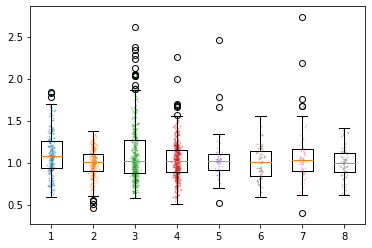

In [26]:
# for dna

# 
args = []
for _exp_key, _exp_df in out_df_dict.items():
    g_inc = _exp_df['normalized_inc_dna']
    g_ctrl = _exp_df['normalized_subset_control_dna']
    args.append(g_inc)
    args.append(g_ctrl)
    
#g1 = out_df_dict['Control']['normalized_inc_dna']
#g2 = out_df_dict['Control']['normalized_subset_control_dna']
#g3 = out_df_dict['HDACi']['normalized_inc_dna']
#g4 = out_df_dict['HDACi']['normalized_subset_control_dna']

#sp_low = min(len(g1),len(g2),len(g3))
#sp_low = min(len(g1),len(g2), len(g3))

#g1 = np.random.choice(g1, sp_low)
#g2 = np.random.choice(g2, sp_low)
#g3 = np.random.choice(g3, sp_low)
#g4 = np.random.choice(g4, sp_low)
#args = (g1,g2,g3,g4)
boxplot_pol2= plt.boxplot([*args], meanline = True)


vals, xs = [], [] 

for i, subdf in enumerate([*args]):
    #names.append(name)
    vals.append(subdf.tolist())
    xs.append(np.random.normal(i+1, 0.04, subdf.shape[0]))

for x, val in zip(xs, vals):
    plt.scatter(x, val,  s = 1, alpha=0.3)

from scipy.stats import mannwhitneyu
from scipy.stats import kruskal

p4 = kruskal(args[0],args[2],args[4],args[6])

#U1, p1 = mannwhitneyu(g1,g3)

print(f"MW comparision: {p4}")



#print(f"three samples comparision: {p4}")

MW comparision: KruskalResult(statistic=10.307604614356478, pvalue=0.016124467355118688)


c:\programdata\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1449: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


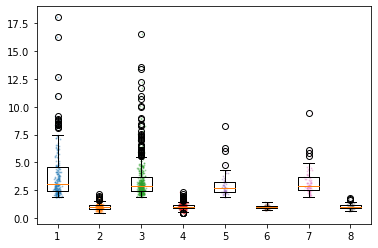

In [27]:
# for mdc1

args = []
for _exp_key, _exp_df in out_df_dict.items():
    g_inc = _exp_df['normalized_inc_Mdc1']
    g_ctrl = _exp_df['normalized_subset_control_Mdc1']
    args.append(g_inc)
    args.append(g_ctrl)
    
#g1 = out_df_dict['Control']['normalized_inc_dna']
#g2 = out_df_dict['Control']['normalized_subset_control_dna']
#g3 = out_df_dict['HDACi']['normalized_inc_dna']
#g4 = out_df_dict['HDACi']['normalized_subset_control_dna']

#sp_low = min(len(g1),len(g2),len(g3))
#sp_low = min(len(g1),len(g2), len(g3))

#g1 = np.random.choice(g1, sp_low)
#g2 = np.random.choice(g2, sp_low)
#g3 = np.random.choice(g3, sp_low)
#g4 = np.random.choice(g4, sp_low)
#args = (g1,g2,g3,g4)
boxplot_pol2= plt.boxplot([*args], meanline = True)


vals, xs = [], [] 

for i, subdf in enumerate([*args]):
    #names.append(name)
    vals.append(subdf.tolist())
    xs.append(np.random.normal(i+1, 0.04, subdf.shape[0]))

for x, val in zip(xs, vals):
    plt.scatter(x, val,  s = 1, alpha=0.3)

from scipy.stats import mannwhitneyu
from scipy.stats import kruskal

p4 = kruskal(args[0],args[2],args[4],args[6])

#U1, p1 = mannwhitneyu(g1,g3)

print(f"MW comparision: {p4}")



#print(f"three samples comparision: {p4}")

c:\programdata\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1449: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


MW comparision: KruskalResult(statistic=5.587270378031008, pvalue=0.1335110655292337)


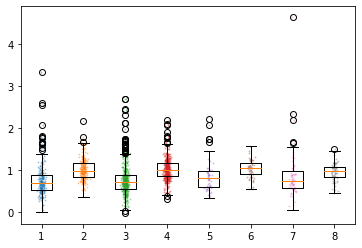

In [28]:
# For Pol2S5

args = []
for _exp_key, _exp_df in out_df_dict.items():
    g_inc = _exp_df['normalized_inc_Pol2S5']
    g_ctrl = _exp_df['normalized_subset_control_Pol2S5']
    args.append(g_inc)
    args.append(g_ctrl)
    
#g1 = out_df_dict['Control']['normalized_inc_dna']
#g2 = out_df_dict['Control']['normalized_subset_control_dna']
#g3 = out_df_dict['HDACi']['normalized_inc_dna']
#g4 = out_df_dict['HDACi']['normalized_subset_control_dna']

#sp_low = min(len(g1),len(g2),len(g3))
#sp_low = min(len(g1),len(g2), len(g3))

#g1 = np.random.choice(g1, sp_low)
#g2 = np.random.choice(g2, sp_low)
#g3 = np.random.choice(g3, sp_low)
#g4 = np.random.choice(g4, sp_low)
#args = (g1,g2,g3,g4)
boxplot_pol2= plt.boxplot([*args], meanline = True)


vals, xs = [], [] 

for i, subdf in enumerate([*args]):
    #names.append(name)
    vals.append(subdf.tolist())
    xs.append(np.random.normal(i+1, 0.04, subdf.shape[0]))

for x, val in zip(xs, vals):
    plt.scatter(x, val,  s = 1, alpha=0.3)

from scipy.stats import mannwhitneyu
from scipy.stats import kruskal

p4 = kruskal(args[0],args[2],args[4],args[6])

#U1, p1 = mannwhitneyu(g1,g3)

print(f"MW comparision: {p4}")

MW comparision: KruskalResult(statistic=9.001313229772222, pvalue=0.02927343152344881)


c:\programdata\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1449: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


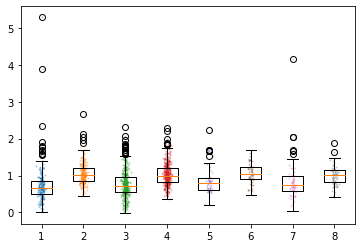

In [29]:
# For Pol2S5 norm to dna

args = []
for _exp_key, _exp_df in out_df_dict.items():
    g_inc = _exp_df['normalized_inc_Pol2S5']/_exp_df['normalized_inc_dna']
    g_ctrl = _exp_df['normalized_subset_control_Pol2S5']/_exp_df['normalized_subset_control_dna']
    args.append(g_inc)
    args.append(g_ctrl)
    
#g1 = out_df_dict['Control']['normalized_inc_dna']
#g2 = out_df_dict['Control']['normalized_subset_control_dna']
#g3 = out_df_dict['HDACi']['normalized_inc_dna']
#g4 = out_df_dict['HDACi']['normalized_subset_control_dna']

#sp_low = min(len(g1),len(g2),len(g3))
#sp_low = min(len(g1),len(g2), len(g3))

#g1 = np.random.choice(g1, sp_low)
#g2 = np.random.choice(g2, sp_low)
#g3 = np.random.choice(g3, sp_low)
#g4 = np.random.choice(g4, sp_low)
#args = (g1,g2,g3,g4)
boxplot_pol2= plt.boxplot([*args], meanline = True)


vals, xs = [], [] 

for i, subdf in enumerate([*args]):
    #names.append(name)
    vals.append(subdf.tolist())
    xs.append(np.random.normal(i+1, 0.04, subdf.shape[0]))

for x, val in zip(xs, vals):
    plt.scatter(x, val,  s = 1, alpha=0.3)

from scipy.stats import mannwhitneyu
from scipy.stats import kruskal

p4 = kruskal(args[0],args[2],args[4],args[6])

#U1, p1 = mannwhitneyu(g1,g3)

print(f"MW comparision: {p4}")

c:\programdata\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1449: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


MW comparision: KruskalResult(statistic=8.858424754162115, pvalue=0.031233647460855548)


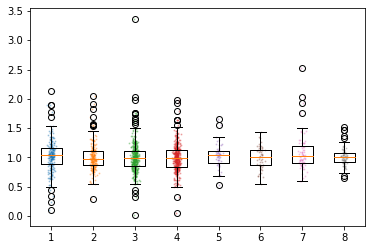

In [33]:
# For H2ax-key relevant Ab


args = []
for _exp_key, _exp_df in out_df_dict.items():
    g_inc = _exp_df[f'normalized_inc_{actual_h2ax_key}']
    g_ctrl = _exp_df[f'normalized_subset_control_{actual_h2ax_key}']
    args.append(g_inc)
    args.append(g_ctrl)
    
#g1 = out_df_dict['Control']['normalized_inc_dna']
#g2 = out_df_dict['Control']['normalized_subset_control_dna']
#g3 = out_df_dict['HDACi']['normalized_inc_dna']
#g4 = out_df_dict['HDACi']['normalized_subset_control_dna']

#sp_low = min(len(g1),len(g2),len(g3))
#sp_low = min(len(g1),len(g2), len(g3))

#g1 = np.random.choice(g1, sp_low)
#g2 = np.random.choice(g2, sp_low)
#g3 = np.random.choice(g3, sp_low)
#g4 = np.random.choice(g4, sp_low)
#args = (g1,g2,g3,g4)
boxplot_pol2= plt.boxplot([*args], meanline = True)


vals, xs = [], [] 

for i, subdf in enumerate([*args]):
    #names.append(name)
    vals.append(subdf.tolist())
    xs.append(np.random.normal(i+1, 0.04, subdf.shape[0]))

for x, val in zip(xs, vals):
    plt.scatter(x, val,  s = 1, alpha=0.3)

from scipy.stats import mannwhitneyu
from scipy.stats import kruskal

p4 = kruskal(args[0],args[2],args[4],args[6])

#U1, p1 = mannwhitneyu(g1,g3)

print(f"MW comparision: {p4}")

MW comparision: KruskalResult(statistic=4.339635598070345, pvalue=0.2270482603007314)


c:\programdata\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1449: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


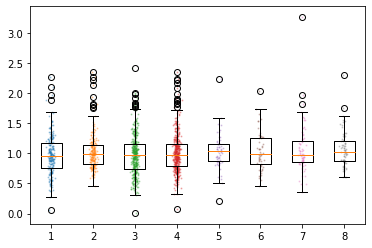

In [31]:
# For H2ax-key relevant Ab


args = []
for _exp_key, _exp_df in out_df_dict.items():
    g_inc = _exp_df[f'normalized_inc_{actual_h2ax_key}']/_exp_df['normalized_inc_dna']
    g_ctrl = _exp_df[f'normalized_subset_control_{actual_h2ax_key}']/_exp_df['normalized_subset_control_dna']
    args.append(g_inc)
    args.append(g_ctrl)
    
#g1 = out_df_dict['Control']['normalized_inc_dna']
#g2 = out_df_dict['Control']['normalized_subset_control_dna']
#g3 = out_df_dict['HDACi']['normalized_inc_dna']
#g4 = out_df_dict['HDACi']['normalized_subset_control_dna']

#sp_low = min(len(g1),len(g2),len(g3))
#sp_low = min(len(g1),len(g2), len(g3))

#g1 = np.random.choice(g1, sp_low)
#g2 = np.random.choice(g2, sp_low)
#g3 = np.random.choice(g3, sp_low)
#g4 = np.random.choice(g4, sp_low)
#args = (g1,g2,g3,g4)
boxplot_pol2= plt.boxplot([*args], meanline = True)


vals, xs = [], [] 

for i, subdf in enumerate([*args]):
    #names.append(name)
    vals.append(subdf.tolist())
    xs.append(np.random.normal(i+1, 0.04, subdf.shape[0]))

for x, val in zip(xs, vals):
    plt.scatter(x, val,  s = 1, alpha=0.3)

from scipy.stats import mannwhitneyu
from scipy.stats import kruskal

p4 = kruskal(args[0],args[2],args[4],args[6])

#U1, p1 = mannwhitneyu(g1,g3)

print(f"MW comparision: {p4}")

In [35]:
from scipy import stats
stats.spearmanr(out_df_dict['Control']['normalized_inc_Pol2S5'], out_df_dict['Control'][f'normalized_inc_{actual_h2ax_key}'])

SpearmanrResult(correlation=0.6807587470396352, pvalue=2.9889476232406233e-20)

In [32]:
plt.scatter(x= out_df_dict['Control']['normalized_inc_Pol2S5'], y =out_df_dict['Control'][f'normalized_inc_{actual_h2ax_key}'])


KeyError: 'Control'

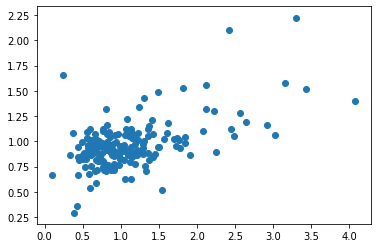

In [38]:
plt.scatter(x= out_df_dict['HDACi']['normalized_inc_Pol2S5'], y =out_df_dict['HDACi'][f'normalized_inc_{actual_h2ax_key}'])
